In [1]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dadiyaharsh","key":"20d37a321e7d95d5ed4313feaaf66a19"}'}

In [8]:
import os
import shutil

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle")
os.chmod("/root/.kaggle/kaggle.json", 600)

In [9]:
!kaggle competitions download -c mercari-price-suggestion-challenge

100% 403M/403M [00:05<00:00, 68.7MB/s]
100% 403M/403M [00:05<00:00, 76.4MB/s]


In [10]:
!unzip mercari-price-suggestion-challenge.zip -d ./mercari_data

Archive:  mercari-price-suggestion-challenge.zip
  inflating: ./mercari_data/sample_submission.csv.7z  
  inflating: ./mercari_data/sample_submission_stg2.csv.zip  
  inflating: ./mercari_data/test.tsv.7z  
  inflating: ./mercari_data/test_stg2.tsv.zip  
  inflating: ./mercari_data/train.tsv.7z  


In [13]:
!cd mercari_data
!ls

mercari_data  mercari-price-suggestion-challenge.zip  sample_data


In [14]:
!apt-get install -y p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [15]:
!7z e ./mercari_data/train.tsv.7z -o./mercari_data/
!7z e ./mercari_data/test.tsv.7z -o./mercari_data/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ./mercari_data/                         1 file, 77912192 bytes (75 MiB)

Extracting archive: ./mercari_data/train.tsv.7z
--
Path = ./mercari_data/train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      4% - train.tsv                  9% - train.tsv                 14% - train.tsv                 19% - train.tsv                 24% - train.tsv                 29% - train.tsv                 34% - train.tsv                 39% - t

In [16]:
!unzip ./mercari_data/sample_submission_stg2.csv.zip -d ./mercari_data/
!unzip ./mercari_data/test_stg2.tsv.zip -d ./mercari_data/

Archive:  ./mercari_data/sample_submission_stg2.csv.zip
  inflating: ./mercari_data/sample_submission_stg2.csv  
Archive:  ./mercari_data/test_stg2.tsv.zip
  inflating: ./mercari_data/test_stg2.tsv  


In [17]:
!ls -lh ./mercari_data

total 1.7G
-rw-r--r-- 1 root root 171K Dec 11  2019 sample_submission.csv.7z
-rw-r--r-- 1 root root  49M Jun 20  2018 sample_submission_stg2.csv
-rw-r--r-- 1 root root 7.8M Dec 11  2019 sample_submission_stg2.csv.zip
-rw-r--r-- 1 root root 737M Jun 20  2018 test_stg2.tsv
-rw-r--r-- 1 root root 295M Dec 11  2019 test_stg2.tsv.zip
-rw-r--r-- 1 root root 148M Nov 11  2017 test.tsv
-rw-r--r-- 1 root root  34M Dec 11  2019 test.tsv.7z
-rw-r--r-- 1 root root 323M Nov 11  2017 train.tsv
-rw-r--r-- 1 root root  75M Dec 11  2019 train.tsv.7z


In [18]:
!pwd

/content


In [19]:
!ls

mercari_data  mercari-price-suggestion-challenge.zip  sample_data


In [20]:
%cd ./mercari_data
!pwd  # Show the current working directory


/content/mercari_data
/content/mercari_data


In [21]:
!ls

sample_submission.csv.7z	test_stg2.tsv	   test.tsv.7z
sample_submission_stg2.csv	test_stg2.tsv.zip  train.tsv
sample_submission_stg2.csv.zip	test.tsv	   train.tsv.7z


In [23]:
import numpy as np
import pandas as pd

In [24]:
train_data = pd.read_csv('train.tsv', sep = '\t')

In [25]:
test_data = pd.read_csv('test.tsv', sep = '\t')

# EDA

In [26]:
train_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [27]:
test_data.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [29]:
y = train_data['price']

In [30]:
y

,price
0,10.0
1,52.0
2,10.0
3,35.0
4,44.0
...,...
1482530,20.0
1482531,14.0
1482532,12.0
1482533,45.0


In [31]:
y.describe()

,price
count,1.482535e+06
mean,2.673752e+01
std,3.858607e+01
min,0.000000e+00
25%,1.000000e+01
50%,1.700000e+01
75%,2.900000e+01
max,2.009000e+03


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

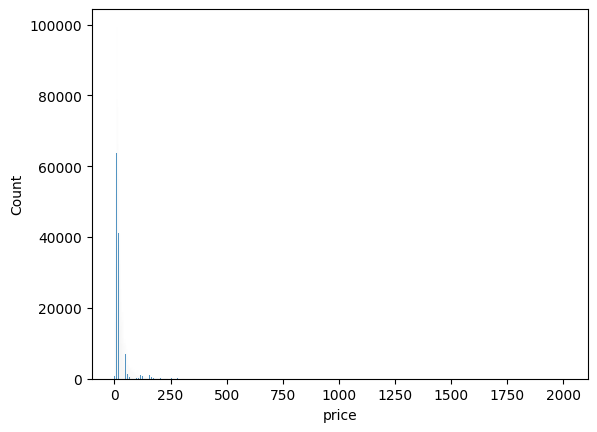

In [33]:
sns.histplot(y)
plt.show()

## since data is left skewed, so we have to do log transformation to make it normal distribution form

# Data Cleaning and prepration

In [34]:
y_log = np.log1p(y)

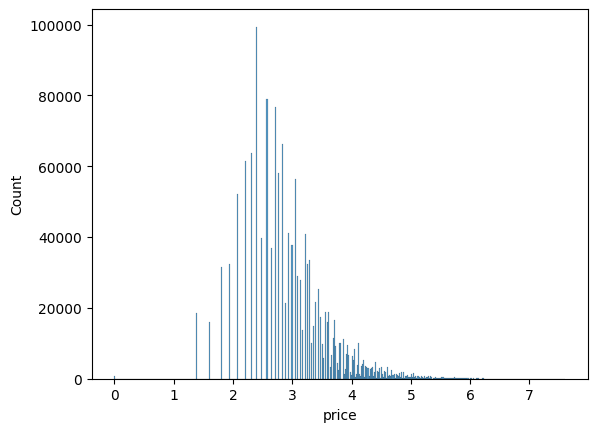

In [35]:
sns.histplot(y_log)
plt.show()

In [36]:
train_data['price'] = np.log1p(train_data['price'])
train_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,2.397895,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,3.970292,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,2.397895,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,3.583519,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,3.806662,0,Complete with certificate of authenticity


##  since there are 3 category written in category_name section, so we can divide these into 3 coloumns..

In [39]:
def split_category(category_name: str) -> list[str]:
  try:
    return category_name.split('/')
  except:
    return ['NULL', 'NULL', 'NULL']

In [40]:
category_1 = []
category_2 = []
category_3 = []
"""
    just for debugging..
    a = split_category(train_data['category_name'][1])
    print(a[0])
"""
for i in range(train_data.shape[0]):
    temp = split_category(train_data['category_name'][i])
    category_1.append(temp[0])
    category_2.append(temp[1])
    category_3.append(temp[2])

train_data['category_1'] = category_1
train_data['category_2'] = category_2
train_data['category_3'] = category_3

## checking if there is null value in data and if there is then replacing with string value..

In [41]:
print('1st Category :', train_data['category_1'].value_counts())
print('2nd Category :', train_data['category_2'].nunique())
print('3rd Category :', train_data['category_3'].nunique())

1st Category : category_1
Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
NULL                        6327
Name: count, dtype: int64
2nd Category : 114
3rd Category : 871


In [42]:
train_data.isnull().sum()

,0
train_id,0
name,0
item_condition_id,0
category_name,6327
brand_name,632682
price,0
shipping,0
item_description,6
category_1,0
category_2,0


In [43]:
train_data['category_name'] = train_data['category_name'].fillna('NULL')
train_data['brand_name'] = train_data['brand_name'].fillna('NULL')
train_data['item_description'] = train_data['item_description'].fillna('NULL')

In [44]:
train_data.isnull().sum()

,0
train_id,0
name,0
item_condition_id,0
category_name,0
brand_name,0
price,0
shipping,0
item_description,0
category_1,0
category_2,0


## now doing same thing for test data

In [45]:
category_1_test = []
category_2_test = []
category_3_test = []

for i in range(test_data.shape[0]):
    temp = split_category(test_data['category_name'][i])
    category_1_test.append(temp[0])
    category_2_test.append(temp[1])
    category_3_test.append(temp[2])
test_data['category_1'] = category_1_test
test_data['category_2'] = category_2_test
test_data['category_3'] = category_3_test


In [46]:
print('1st Category :', test_data['category_1'].value_counts())
print('2nd Category :', test_data['category_2'].nunique())
print('3rd Category :', test_data['category_3'].nunique())

1st Category : category_1
Women                     310048
Beauty                     97265
Kids                       80225
Electronics                57679
Men                        44066
Home                       31966
Vintage & Collectibles     21410
Other                      21409
Handmade                   14335
Sports & Outdoors          11898
NULL                        3058
Name: count, dtype: int64
2nd Category : 114
3rd Category : 834


In [47]:
test_data.isnull().sum()

,0
test_id,0
name,0
item_condition_id,0
category_name,3058
brand_name,295525
shipping,0
item_description,0
category_1,0
category_2,0
category_3,0


In [48]:
test_data['category_name'] = test_data['category_name'].fillna('NULL')
test_data['brand_name'] = test_data['brand_name'].fillna('NULL')


In [49]:
test_data.isnull().sum()

,0
test_id,0
name,0
item_condition_id,0
category_name,0
brand_name,0
shipping,0
item_description,0
category_1,0
category_2,0
category_3,0


# Feature Encoding and vectorization

## combining training and testing dataset

In [50]:
train_data_target = train_data['price']
train_data.drop('price', axis = 1, inplace = True)

mercari_df = pd.concat([train_data, test_data], axis = 0).reset_index(drop = True)
mercari_df.head()

,train_id,name,item_condition_id,category_name,brand_name,shipping,item_description,category_1,category_2,category_3,test_id
0,0.0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NULL,1,No description yet,Men,Tops,T-shirts,NaN
1,1.0,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,NaN
2,2.0,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,NaN
3,3.0,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NULL,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,NaN
4,4.0,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NULL,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,NaN


## since train_id and test_id are useless ,so we can remove it.

In [51]:
mercari_df = mercari_df.drop(['train_id', 'test_id'], axis = 1)

In [52]:
mercari_df

,name,item_condition_id,category_name,brand_name,shipping,item_description,category_1,category_2,category_3
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NULL,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NULL,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NULL,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...
2175889,Quartz crystal on Flint stone,1,Home/Home Décor/Home Décor Accents,NULL,0,Flint/Quartz cluster. Self mined ✨measures 3x2...,Home,Home Décor,Home Décor Accents
2175890,It Cosmetics - Travel Bundle,1,Beauty/Makeup/Makeup Sets,IT Cosmetics,1,It Cosmetics travel bundle. Includes: Brow pow...,Beauty,Makeup,Makeup Sets
2175891,Galaxy S8 hard shell case,1,"Electronics/Cell Phones & Accessories/Cases, C...",NULL,1,New. Free shipping Basstop case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins"
2175892,Hi low floral kimono,2,Women/Swimwear/Cover-Ups,NULL,0,Floral kimono. Tropical print. Open front. Hi ...,Women,Swimwear,Cover-Ups


In [53]:
# for memory cleaning
import gc
gc.collect()

629

# importing neccesary libraries

In [54]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

## feature vectorization

In [55]:
cntc_vec = CountVectorizer()

In [57]:
x_name = cntc_vec.fit_transform(mercari_df['name'])

tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range = (1, 3), stop_words = 'english')
x_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', x_name.shape)
print('descp vectorization shape:', x_descp.shape)

name vectorization shape: (2175894, 131042)
descp vectorization shape: (2175894, 50000)


# feature encoding(using one hot encoder)

In [58]:
ohe = OneHotEncoder()

In [59]:
x_brand_name = ohe.fit_transform(mercari_df['brand_name'].values.reshape(-1, 1))
x_category_1 = ohe.fit_transform(mercari_df['category_1'].values.reshape(-1, 1))
x_category_2 = ohe.fit_transform(mercari_df['category_2'].values.reshape(-1, 1))
x_category_3 = ohe.fit_transform(mercari_df['category_3'].values.reshape(-1, 1))
x_item_condition_id = ohe.fit_transform(mercari_df['item_condition_id'].values.reshape(-1, 1))
x_shipping = ohe.fit_transform(mercari_df['shipping'].values.reshape(-1, 1))

In [60]:
print('brand_name shape:', x_brand_name.shape)
print('category_1 shape:', x_category_1.shape)
print('category_2 shape:', x_category_2.shape)
print('category_3 shape:', x_category_3.shape)
print('item_condition_id shape:', x_item_condition_id.shape)
print('shipping shape:', x_shipping.shape)

brand_name shape: (2175894, 5290)
category_1 shape: (2175894, 11)
category_2 shape: (2175894, 114)
category_3 shape: (2175894, 883)
item_condition_id shape: (2175894, 5)
shipping shape: (2175894, 2)


##  combining feature vectorized sparse matrix and one hot encoded sparse matrix

In [61]:
from lightgbm import LGBMRegressor
from scipy.sparse import hstack

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [62]:
combined_matrix_train = (x_name[:1482535], x_descp[:1482535], x_brand_name[:1482535], x_item_condition_id[:1482535],
                         x_shipping[:1482535], x_category_1[:1482535], x_category_2[:1482535], x_category_3[:1482535])
x_train = hstack(combined_matrix_train).tocsr()

combined_matrix_test = (x_name[1482535:], x_descp[1482535:], x_brand_name[1482535:], x_item_condition_id[1482535:],
                        x_shipping[1482535:], x_category_1[1482535:], x_category_2[1482535:], x_category_3[1482535:])
x_test = hstack(combined_matrix_test).tocsr()

y_train = train_data_target





## Ridge regression, since here we have to predict price,  using regression and features are multicollinear so ridge regression..

In [63]:
ridge = Ridge(solver = 'lsqr', fit_intercept = False)
ridge.fit(x_train, y_train)
preds = ridge.predict(x_test)
print(preds)
print()

[2.3375786  2.46690851 3.87587762 ... 2.01114781 2.73050909 2.64450475]



## since we had done log trnasformation, so we are doing it exponnetial transformation so it becomes normal..

In [65]:
preds = np.expm1(preds)

In [67]:
final_submission = pd.DataFrame()
final_submission['test_id'] = test_data['test_id']
final_submission['price'] = preds
final_submission.head()

,test_id,price
0,0,9.356130
1,1,10.785954
2,2,47.225003
3,3,17.210900
4,4,7.166903


In [68]:
final_submission.to_csv('submission.csv', index = False, header = True)

In [69]:
final_submission.shape

(693359, 2)